# Author: Arslan Haider Khan 

# TASK 3: Exploratory Data Analysis

# Problem Statement: Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’

# Dataset : 
https://drive.google.com/file/d/1lV7is1B566UQPYzzY8R2ZmOritTW299S/view

# Loading datasets 

In [3]:
# import necessary libraries
import numpy as np               #for numerical computation
import pandas as pd              #for loading dataset
import matplotlib.pyplot as plt #for visualization
import seaborn as sns            #for visualization
%matplotlib inline

In [5]:
# loading dataset
df = pd.read_csv(r'C:\Users\laptop house\Desktop\TSF tasks\Task 3\SampleSuperstore.csv')
# printing first five rows of dataset
df.head()



,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


So our data is loaded properly and there are many columns in our data to be analysed but first of all lets check the info and shape of the data and do some prepocessing like dropping the duplicates and checking the null values and deleting some unnecessary columns

# Preprocessing the data 

In [6]:
#checking the shape before removing duplicates
print(df.shape)

#deleting the duplicates
df.drop_duplicates(inplace=True)



(9994, 13)


In [7]:
#checking the shape after removing duplicates
df.shape

(9977, 13)

In [8]:
#checking the info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9977 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9977 non-null   object 
 1   Segment       9977 non-null   object 
 2   Country       9977 non-null   object 
 3   City          9977 non-null   object 
 4   State         9977 non-null   object 
 5   Postal Code   9977 non-null   int64  
 6   Region        9977 non-null   object 
 7   Category      9977 non-null   object 
 8   Sub-Category  9977 non-null   object 
 9   Sales         9977 non-null   float64
 10  Quantity      9977 non-null   int64  
 11  Discount      9977 non-null   float64
 12  Profit        9977 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1.1+ MB


In [9]:
#checking the null values
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [10]:
#checking again the data 
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


So all prepossing done now its time to do the EDA of the data.

# Exploratory Data Analysis

Lets us first find the Segments in terms of sales and their performance

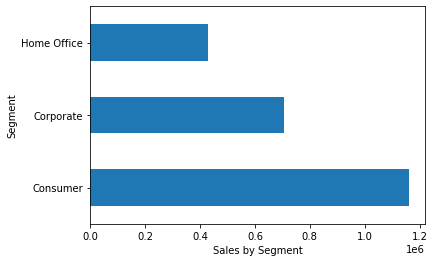

In [11]:
#grouping the segment data by sales
new_df=df.groupby(by="Segment")["Sales"].sum().sort_values(ascending=False)

#plotting the graph
new_df.plot(kind="barh")
plt.xlabel('Sales by Segment');

# Interpretation 

So there is more sales in Consumer segment and very less sales in Home Office segment

By further digging more into each of the segment in terms of region, we will be analysing more result.

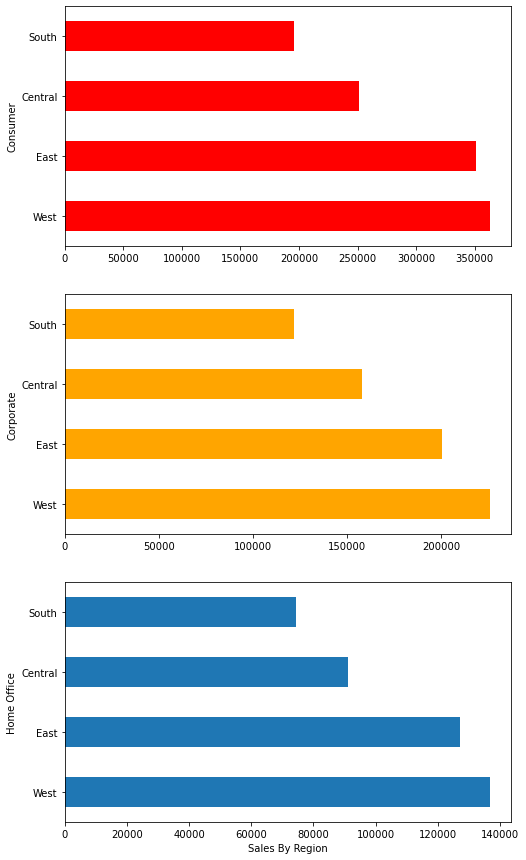

In [12]:


#grouping segments in terms of region
#for Consumer Segment
segment_1=df[df['Segment']=='Consumer']
new_df1=segment_1.groupby(by="Region")["Sales"].sum().sort_values(ascending=False)

#for Corporate Segment
segment_2=df[df['Segment']=='Corporate']
new_df2=segment_2.groupby(by="Region")["Sales"].sum().sort_values(ascending=False)

#for Home Office Segment
segment_3=df[df['Segment']=='Home Office']
new_df3=segment_3.groupby(by="Region")["Sales"].sum().sort_values(ascending=False)

#plotting the graphs
plt.figure(figsize=(8,15))
ax1=plt.subplot(3,1,1)
new_df1.plot(kind="barh",ax=ax1,color="red")
ax1.set_ylabel("Consumer")

ax2=plt.subplot(3,1,2)
new_df2.plot(kind="barh",ax=ax2,color="orange")
ax2.set_ylabel("Corporate")

ax3=plt.subplot(3,1,3)
new_df3.plot(kind="barh",ax=ax3)
ax3.set_ylabel("Home Office")
plt.xlabel('Sales By Region');



# Interpretation 

So being low or high on sales there is some similar trends on the Segments columns which is in West Region the sales are high and its gradually decrease till the south where Central and South has to be take in notice because they are almost half of sales of west

Lets further dig into the data to find some more unknown and suprising trends.

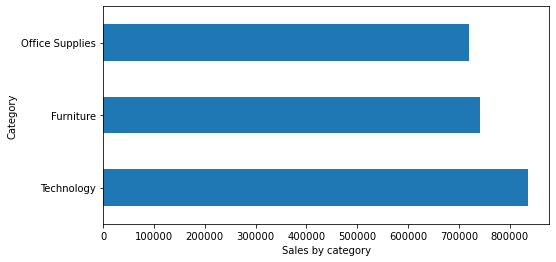

In [13]:
#grouping sales by category
new_df=df.groupby(by="Category")["Sales"].sum().sort_values(ascending=False)

#plotting the graph
plt.figure(figsize=(8,4))
new_df.plot(kind="barh")
plt.xlabel('Sales by category');

# Intrepretation

From the above plot which is category in terms of sales we are clearly seeing that Technology Category has high sales and Office suplies has low sales

Lets further split the Category to see the insights trends

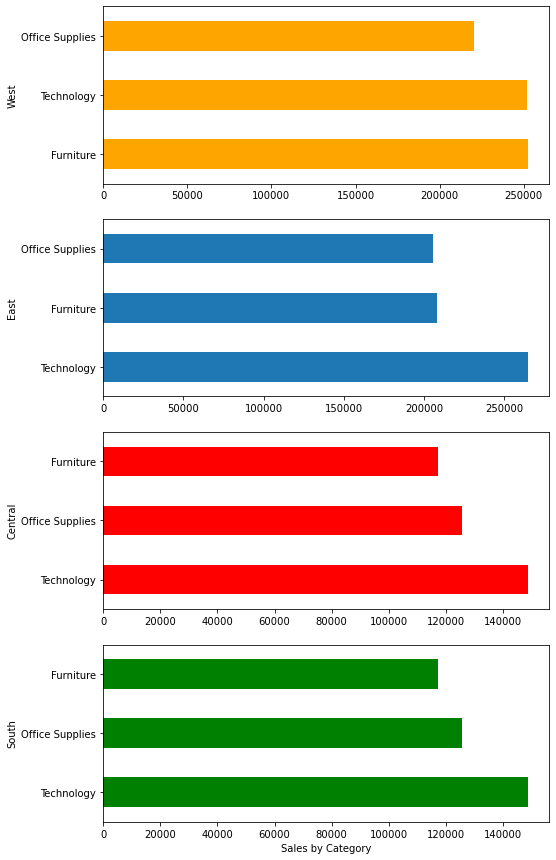

In [14]:
#grouping Regions in terms of Category
#for West Region
category_1=df[df['Region']=='West']
new_df1=category_1.groupby(by="Category")["Sales"].sum().sort_values(ascending=False)

#for East Region
category_2=df[df['Region']=='East']
new_df2=category_2.groupby(by="Category")["Sales"].sum().sort_values(ascending=False)

#for North Region
category_3=df[df['Region']=='Central']
new_df3=category_3.groupby(by="Category")["Sales"].sum().sort_values(ascending=False)

#for South Region
category_4=df[df['Region']=='South']
new_df3=category_4.groupby(by="Category")["Sales"].sum().sort_values(ascending=False)

#plotting the graphs
plt.figure(figsize=(8,15))
ax1=plt.subplot(4,1,1)
new_df1.plot(kind="barh",ax=ax1,color="orange");
ax1.set_ylabel("West");

ax2=plt.subplot(4,1,2)
new_df2.plot(kind="barh",ax=ax2);
ax2.set_ylabel("East");

ax3=plt.subplot(4,1,3)
new_df3.plot(kind="barh",ax=ax3,color="red");
ax3.set_ylabel("Central")

ax4=plt.subplot(4,1,4)
new_df3.plot(kind="barh",ax=ax4,color="green");
ax4.set_ylabel("South")
plt.xlabel('Sales by Category');

# Interpretation

So from the above graph West Region is having best sales in all the three catogories.
And In East Region, technology is having best sales where office supplies and furniture has almost same sales.
In North Region, there is huge drop in sales as comparing to east and west by 100000
And In South Region, there is almost same trends as north region in terms of sales.


Lets us find other suprising trends which affects the sales.

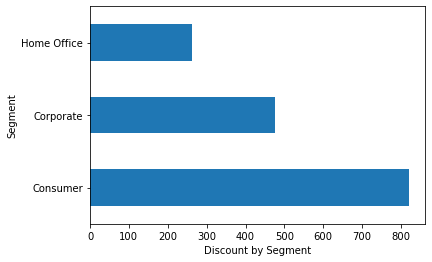

In [15]:
#grouping in terms of discount
new_df=df.groupby(by="Segment")["Discount"].sum().sort_values(ascending=False)

#plotting the graph
new_df.plot(kind="barh")
plt.xlabel('Discount by Segment');

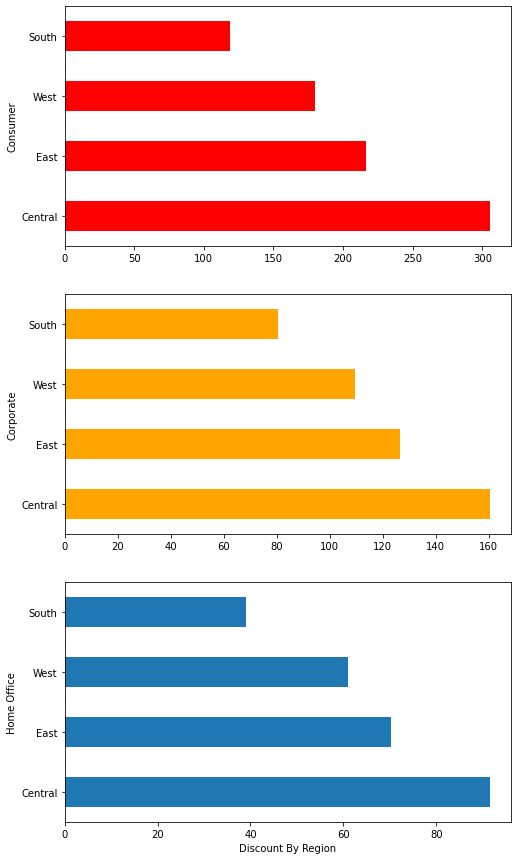

In [16]:
#grouping segments in terms of region
#for Consumer Segment
discount_1=df[df['Segment']=='Consumer']
new_df1=discount_1.groupby(by="Region")["Discount"].sum().sort_values(ascending=False)

#for Corporate Segment
discount_2=df[df['Segment']=='Corporate']
new_df2=discount_2.groupby(by="Region")["Discount"].sum().sort_values(ascending=False)

#for Home Office Segment
discount_3=df[df['Segment']=='Home Office']
new_df3=discount_3.groupby(by="Region")["Discount"].sum().sort_values(ascending=False)

#plotting the graphs
plt.figure(figsize=(8,15))
ax1=plt.subplot(3,1,1)
new_df1.plot(kind="barh",ax=ax1,color="red")
ax1.set_ylabel("Consumer")

ax2=plt.subplot(3,1,2)
new_df2.plot(kind="barh",ax=ax2,color="orange")
ax2.set_ylabel("Corporate")

ax3=plt.subplot(3,1,3)
new_df3.plot(kind="barh",ax=ax3)
ax3.set_ylabel("Home Office")
plt.xlabel('Discount By Region');

# Conlusion 

So from all of this we are now know the weak areas in terms of business aspects which needs to be taken into consideration for improving sales. The weak area from above EDA are

Exploratory Data Analysis

# Thank You !